# Using Python & R in the same notebook

To run this notebook, an implementation of R should be installed in your environment, as well as the `rpy2` package that "translates" between Python and R data types.

The easiest way to install the requirements is to use conda, e.g.,
~~~bash
$ conda create  -n rpy  rpy2 numpy matplotlib pandas r-ggplot notebook
~~~

Import numpy for numerical arrays in Python, and load the `rpy2` iPython extension.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Translating variables between Python and R

Define a vector in R, and assign it to the variable `values`, which is exported to Python (`-o` option).

In [2]:
%%R -o values
values <- c(3, 7, 5)

`values` is now also a Python variable, but with a `rpy2` specific type.

In [3]:
type(values)

rpy2.robjects.vectors.FloatVector

A `FloatVector` supports some of the useful Python interfaces, so we can use the built-in Python `sum` function.

In [4]:
sum(values)

15.0

We can define a numpy array, and use that in R as if it were a vector.

In [5]:
p_values = np.array([3, 7, 9], dtype=np.float64)

In [6]:
%%R -i p_values -o my_sum
cat('R type:', typeof(p_values))
my_sum <- sum(p_values)

R type: double

Although the result is semantically a number, it is returned as a `FloatVector` as is typical in R.

In [7]:
type(my_sum)

rpy2.robjects.vectors.FloatVector

In [8]:
print(my_sum[0])

19.0


In [9]:
type(my_sum[0])

float

As an alternative to the cell magic `%%R -i` and `%%R -o`, you can also use the `%Rpush` and `%Rpull` magic.  This simple "transfers" data to R and from R respectively.

Create a numpy array, and push it to R.

In [11]:
x = np.linspace(0.0, 1.0, 101)

In [12]:
%Rpush x

Do some computations in R, e.g., computing the square root of `x`.

In [13]:
%%R
y = sqrt(x)

Get the resulting `y` values back into Python.

In [14]:
%Rpull y

Plot `y` versus `x` using matplotlib.

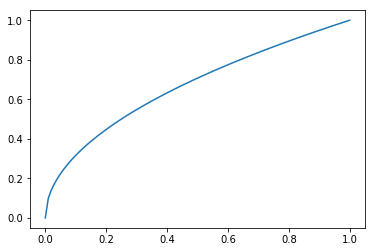

In [18]:
plt.plot(x, y);

## Using R libraries

Load the required R library `ggplot2` using `require`.

In [20]:
%R require(ggplot2)

/home/gjb/miniconda3/envs/rpy/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)


array([1], dtype=int32)

Create a data with four columns. The first, `letter`, is categorical with values `a`, `b`, `c`.  The three other columns, `X`, `Y` and `Z` have numerical values between 1 and 9, 0 and 13, and 1 and 3 respectively.

In [22]:
df = pd.DataFrame({
        'Letter': ['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c'],
        'X': [4, 3, 5, 2, 1, 7, 7, 5, 9],
        'Y': [0, 4, 3, 6, 7, 10, 11, 9, 13],
        'Z': [1, 2, 3, 1, 2, 3, 1, 2, 3]
    })

Create a plot using `ggplot` that uses the data frame as data, creates a geometric point plot using `x` and `Y` as axes (`aes`), the categorical data as color, and `Z` as size.

/home/gjb/miniconda3/envs/rpy/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


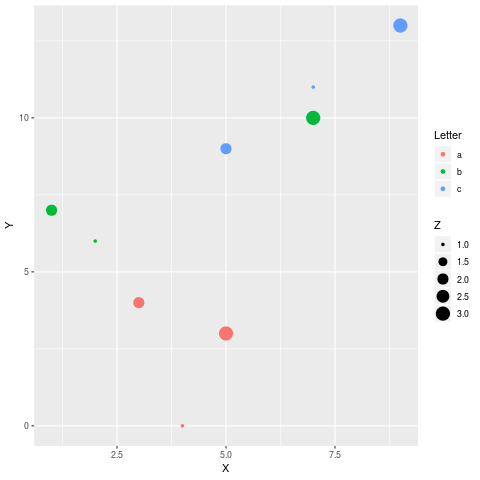

In [23]:
%%R -i df
ggplot(data = df) + geom_point(aes(x = X, y= Y, color = Letter, size = Z))